# Merge Owner Characteristics with Business On Sex

In [8]:
import pandas as pd
from config import api_key

# 
us_char = pd.read_json(f'https://api.census.gov/data/2018/abscb?get=NAME,BUSCHAR,SEX,FIRMPDEMP&for=us:*&NAICS2017=00&QDESC=B02&key={api_key}')
us_char.columns = us_char.iloc[0]
us_char = us_char.iloc[1:].reset_index(drop=True)
us_char.head()

,NAME,BUSCHAR,SEX,FIRMPDEMP,NAICS2017,QDESC,us
0,United States,A1,003,3496959,00,B02,1
1,United States,BM,003,293505,00,B02,1
2,United States,BN,003,1407359,00,B02,1
3,United States,BO,003,1700865,00,B02,1
4,United States,BP,003,84544,00,B02,1


In [18]:
us_owner = pd.read_json(f'https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,OWNCHAR,OWNER_SEX,OWNPDEMP&for=us:*&NAICS2017=00&QDESC=O07&QDESC=O05&key={api_key}')
us_owner.columns = us_owner.iloc[0]
us_owner = us_owner.iloc[1:].reset_index(drop=True)
us_owner.head()

,NAME,GEO_ID,OWNCHAR,OWNER_SEX,OWNPDEMP,NAICS2017,QDESC,us
0,United States,0100000US,DE,001,2897036,00,O05,1
1,United States,0100000US,DF,001,1214415,00,O05,1
2,United States,0100000US,DG,001,4111452,00,O05,1
3,United States,0100000US,DH,001,143522,00,O05,1
4,United States,0100000US,DE,002,830716,00,O05,1


Getting rid of extra columns

In [19]:
us_char = us_char[['BUSCHAR', 'SEX', 'FIRMPDEMP', 'QDESC']]
us_char.head()

,BUSCHAR,SEX,FIRMPDEMP,QDESC
0,A1,003,3496959,B02
1,BM,003,293505,B02
2,BN,003,1407359,B02
3,BO,003,1700865,B02
4,BP,003,84544,B02


In [20]:
us_owner = us_owner[['OWNCHAR', 'OWNER_SEX','OWNPDEMP', 'QDESC']]
us_owner.head()

,OWNCHAR,OWNER_SEX,OWNPDEMP,QDESC
0,DE,001,2897036,O05
1,DF,001,1214415,O05
2,DG,001,4111452,O05
3,DH,001,143522,O05
4,DE,002,830716,O05


In [23]:
us_owner.rename(columns={'OWNER_SEX':'SEX'}, inplace=True)
us_owner.head()

,OWNCHAR,SEX,OWNPDEMP,QDESC
0,DE,001,2897036,O05
1,DF,001,1214415,O05
2,DG,001,4111452,O05
3,DH,001,143522,O05
4,DE,002,830716,O05


In [24]:
sex_owner_business = us_owner.merge(us_char, how='inner', on='SEX')
sex_owner_business.head()

,OWNCHAR,SEX,OWNPDEMP,QDESC_x,BUSCHAR,FIRMPDEMP,QDESC_y
0,DE,001,2897036,O05,A1,5722142,B02
1,DE,001,2897036,O05,BM,787775,B02
2,DE,001,2897036,O05,BN,1893857,B02
3,DE,001,2897036,O05,BO,2681631,B02
4,DE,001,2897036,O05,BP,126346,B02


In [28]:
sex_owner_business['FIRMPDEMP'] = sex_owner_business['FIRMPDEMP'].astype(int)
sex_owner_business['OWNPDEMP'] = sex_owner_business['OWNPDEMP'].astype(int)
sex_owner_business.rename(columns={'QDESC_x':'OWNER_Q', 'QDESC_y':'BUSINESS_Q'}, inplace=True)

sex_owner_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OWNCHAR     240 non-null    object
 1   SEX         240 non-null    object
 2   OWNPDEMP    240 non-null    int32 
 3   OWNER_Q     240 non-null    object
 4   BUSCHAR     240 non-null    object
 5   FIRMPDEMP   240 non-null    int32 
 6   BUSINESS_Q  240 non-null    object
dtypes: int32(2), object(5)
memory usage: 13.1+ KB


In [39]:
education_query = sex_owner_business.query('(OWNCHAR != "DT" and OWNCHAR != "DU") and OWNER_Q != "O05" and BUSCHAR == "A1" and SEX != "001"')
female_education_query = education_query.query('SEX == "002"')
male_education_query = education_query.query('SEX == "003"')

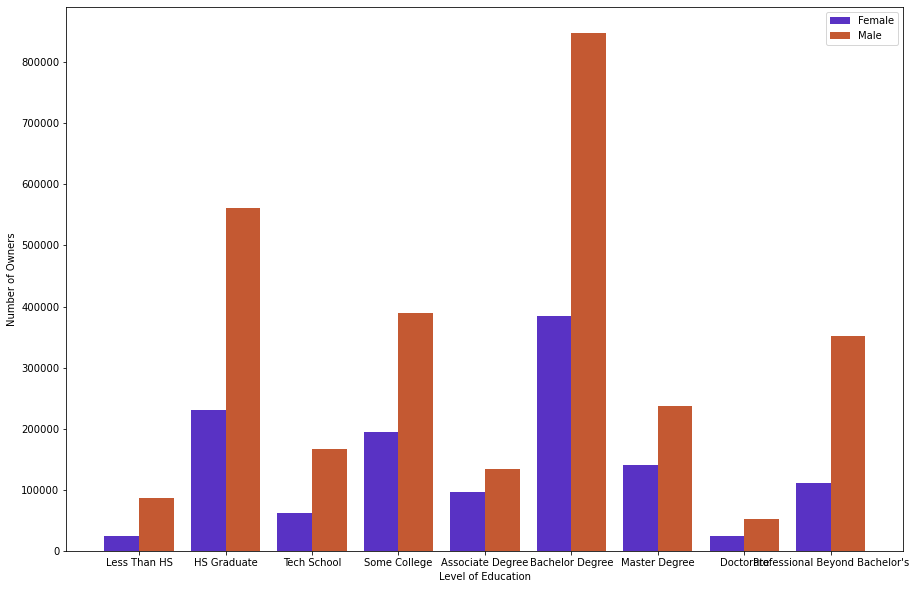

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.ticklabel_format(style='plain')
plt.bar(np.arange(len(female_education_query)) - 0.2, female_education_query['OWNPDEMP'], width=0.4, color='#5932C4', label='Female')
plt.bar(np.arange(len(male_education_query)) + 0.2, male_education_query['OWNPDEMP'], width=0.4, color='#C45932', label='Male')
simple_labels= ['Less Than HS', 'HS Graduate', 'Tech School', 'Some College', 'Associate Degree', 'Bachelor Degree', 'Master Degree', 'Doctorate', "Professional Beyond Bachelor's"]
plt.xticks(range(len(female_education_query)), simple_labels)
# plt.title('Owners By Sex and Level of Educatoin')
plt.xlabel('Level of Education')
plt.ylabel('Number of Owners')
plt.legend()

plt.show()